In [1]:
import os
import pandas as pd
import seaborn as sns
import datetime
import sys
sys.path.append("..")
from functions.functions_analysis import *

# Analysis of summary table data  (data as of 07/12/2020)

In [2]:
sumtable = pd.read_excel("../../data/summary_table_all.xlsx")
sumtable.drop('Unnamed: 0', axis = 1,inplace = True)
len(sumtable)

5771

In [3]:
sumtable.head(2)

,Filing Name,Filing Date,District Court,Exchange,Ticker
0,"The GEO Group, Inc.",07/07/2020,S.D. Florida,New York SE,GEO
1,Wirecard AG,07/07/2020,E.D. Pennsylvania,OTC-BB,WCAGY


In [7]:
top10_court = top10_count(sumtable, "District Court", "Filing Name")
top10_court

,Filing Name,Filing Date,Exchange,Ticker
District Court,,,,
S.D. New York,1406,1406,1382,1314
N.D. California,565,565,559,551
C.D. California,373,373,372,354
D. Delaware,322,322,322,321
D. New Jersey,244,244,243,235
D. Massachusetts,232,232,231,221
S.D. Florida,168,168,164,149
N.D. Illinois,164,164,160,154
E.D. New York,153,153,152,143


In [9]:
top10_exchange = top10_count(sumtable, "Exchange", "Filing Name")
top10_exchange

,Filing Name,Filing Date,District Court,Ticker
Exchange,,,,
NASDAQ,3116,3116,3116,3114
New York SE,2019,2019,2019,2005
Privately Traded,173,173,173,10
OTC-BB,165,165,165,161
American SE,97,97,97,97
Undetermined,37,37,37,2
Open-end Fund,32,32,32,19
Pink Sheets,28,28,28,28
ETF,26,26,26,17


# Analysis of scraped data (data as of 07/12/2020)

In [10]:
scraped_data = pd.read_csv("../../data/data_from_scrapy.csv")
len(scraped_data)

5771

In [11]:
scraped_data.head(2)

,case_brief,case_name,case_status,class_period_end,class_period_start,company_market,court,date_filed,date_of_last_review,docket,...,fic_links_list,fic_summary_table,headquarters,industry,judge,market_status,plaintiffs,sector,ticker_symbol,url
0,"According to the Complaint, Wirecard is a tech...",Wirecard AG Securities Litigation,ONGOING,6/24/20,8/17/15,OTC-BB,E.D. Pennsylvania,7/7/20,7/8/20,20-CV-03326,...,http://securities.stanford.edu/filings-documen...,"{""No"":{""0"":""1"",""1"":""2""},""Document Title"":{""0"":...",Germany,Software & Programming,Hon. ANITA B. BRODY,Public (Listed),"The Rosen Law Firm, P.A. (Jenkintown)",Technology,WCAGY,http://securities.stanford.edu/filings-case.ht...
1,"According to the Complaint, Finjan Holdings, I...","Finjan Holdings, Inc. Securities Litigation",ONGOING,6/29/20,6/10/20,NASDAQ,N.D. California,6/29/20,6/30/20,20-CV-04289,...,http://securities.stanford.edu/filings-documen...,"{""No"":{""0"":""1"",""1"":""2""},""Document Title"":{""0"":...",United States,Software & Programming,Hon. Edward M. Chen,Public (Listed),"Brodsky & Smith, LLC (California)",Technology,FNJN,http://securities.stanford.edu/filings-case.ht...


In [12]:
top10_status = top10_count(scraped_data, "case_status", "case_name")
top10_status

,case_brief,case_name,class_period_end,class_period_start,company_market,court,date_filed,date_of_last_review,docket,fic_doc_links,fic_links_list,fic_summary_table,headquarters,industry,judge,market_status,plaintiffs,sector,ticker_symbol,url
case_status,,,,,,,,,,,,,,,,,,,,
DISMISSED,2669,2669,2665,2663,2649,2669,2669,2669,2668,0,2549,2549,2666,2668,2597,2648,2669,2668,2514,2669
SETTLED,2552,2552,2547,2547,2532,2552,2552,2552,2530,0,2155,2155,2551,2551,2523,2531,2550,2551,2435,2552
ONGOING,524,524,524,524,503,524,524,524,524,0,524,524,524,524,509,504,523,524,499,524


In [13]:
top10_sector = top10_count(scraped_data, "sector", "case_name")
top10_sector

,case_brief,case_name,case_status,class_period_end,class_period_start,company_market,court,date_filed,date_of_last_review,docket,fic_doc_links,fic_links_list,fic_summary_table,headquarters,industry,judge,market_status,plaintiffs,ticker_symbol,url
sector,,,,,,,,,,,,,,,,,,,,
Technology,1451,1451,1446,1449,1449,1444,1451,1451,1446,1435,0,1219,1219,1451,1451,1426,1443,1449,1435,1451
Services,1090,1090,1088,1089,1088,1086,1090,1090,1088,1086,0,963,963,1090,1090,1072,1083,1090,1051,1090
Financial,1032,1032,1027,1028,1027,988,1032,1032,1027,1032,0,981,981,1028,1032,1016,991,1031,819,1032
Healthcare,967,967,959,967,967,966,967,967,959,965,0,934,934,967,967,944,967,967,962,967
Consumer Cyclical,246,246,246,246,246,246,246,246,246,246,0,233,233,246,246,236,246,246,244,246
Energy,212,212,209,211,211,210,212,212,209,212,0,202,202,212,212,203,210,212,205,212
Basic Materials,204,204,204,204,204,202,204,204,204,204,0,193,193,204,204,201,202,204,198,204
Consumer Non-Cyclical,185,185,184,185,185,184,185,185,184,184,0,174,174,185,185,177,184,185,184,185
Capital Goods,173,173,173,173,173,173,173,173,173,173,0,167,167,173,173,172,172,173,170,173


In [14]:
top10_industry = top10_count(scraped_data, "industry", "case_name")
top10_industry

,case_brief,case_name,case_status,class_period_end,class_period_start,company_market,court,date_filed,date_of_last_review,docket,fic_doc_links,fic_links_list,fic_summary_table,headquarters,judge,market_status,plaintiffs,sector,ticker_symbol,url
industry,,,,,,,,,,,,,,,,,,,,
Biotechnology & Drugs,536,536,532,536,536,535,536,536,532,535,0,521,521,536,522,536,536,536,535,536
Software & Programming,490,490,487,490,490,484,490,490,487,483,0,409,409,490,483,484,490,490,483,490
Communications Equipment,239,239,239,239,239,239,239,239,239,236,0,203,203,239,233,239,239,239,237,239
Investment Services,236,236,236,235,234,225,236,236,236,236,0,223,223,235,234,227,235,236,142,236
Medical Equipment & Supplies,230,230,228,230,230,230,230,230,228,229,0,224,224,230,224,230,230,230,228,230
Computer Services,214,214,212,212,212,214,214,214,212,211,0,153,153,214,211,214,212,214,211,214
Business Services,200,200,199,200,200,200,200,200,199,199,0,182,182,200,196,200,200,200,198,200
Semiconductors,178,178,178,178,178,178,178,178,178,176,0,166,166,178,170,178,178,178,178,178
Communications Services,173,173,173,173,173,173,173,173,173,171,0,127,127,173,173,173,173,173,170,173


# Time Series

In [44]:
create_date_intervals(sumtable, "Filing Date")

In [22]:
create_date_intervals(scraped_data, "date_filed")
scraped_data.head(2)

,case_brief,case_name,case_status,class_period_end,class_period_start,company_market,court,date_filed,date_of_last_review,docket,...,industry,judge,market_status,plaintiffs,sector,ticker_symbol,url,year_date_filed,yearmonth_date_filed,month_date_filed
0,"According to the Complaint, Wirecard is a tech...",Wirecard AG Securities Litigation,ONGOING,6/24/20,8/17/15,OTC-BB,E.D. Pennsylvania,7/7/20,7/8/20,20-CV-03326,...,Software & Programming,Hon. ANITA B. BRODY,Public (Listed),"The Rosen Law Firm, P.A. (Jenkintown)",Technology,WCAGY,http://securities.stanford.edu/filings-case.ht...,2020,2020-07,7
1,"According to the Complaint, Finjan Holdings, I...","Finjan Holdings, Inc. Securities Litigation",ONGOING,6/29/20,6/10/20,NASDAQ,N.D. California,6/29/20,6/30/20,20-CV-04289,...,Software & Programming,Hon. Edward M. Chen,Public (Listed),"Brodsky & Smith, LLC (California)",Technology,FNJN,http://securities.stanford.edu/filings-case.ht...,2020,2020-06,6


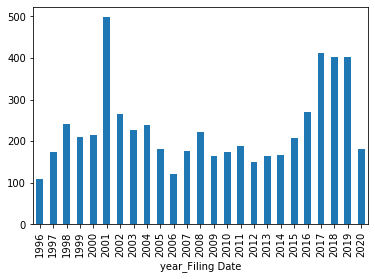

In [4]:
time_series(sumtable, "year_Filing Date", "Filing Name")

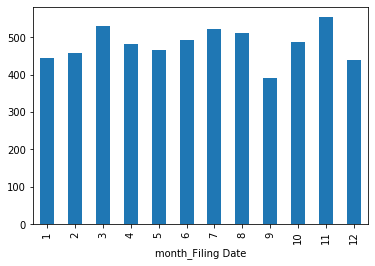

In [9]:
time_series(sumtable, "month_Filing Date", "Filing Name")

In [27]:
scraped_data.groupby("yearmonth_date_filed").count()

,case_brief,case_name,case_status,class_period_end,class_period_start,company_market,court,date_filed,date_of_last_review,docket,...,headquarters,industry,judge,market_status,plaintiffs,sector,ticker_symbol,url,year_date_filed,month_date_filed
yearmonth_date_filed,,,,,,,,,,,,,,,,,,,,,
1996-01,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,4,5,5,5
1996-02,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,4,5,5,5
1996-03,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,7,8,8,8
1996-04,14,14,14,14,14,13,14,14,14,14,...,14,14,14,13,14,14,12,14,14,14
1996-05,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03,38,38,38,38,38,38,38,38,38,38,...,38,38,37,38,38,38,38,38,38,38
2020-04,44,44,44,44,44,33,44,44,44,44,...,44,44,44,33,44,44,33,44,44,44
2020-05,16,16,16,16,16,16,16,16,16,16,...,16,16,15,16,16,16,16,16,16,16


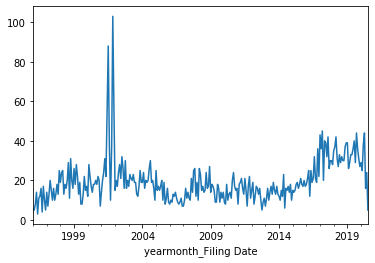

In [10]:
time_series(sumtable, "yearmonth_Filing Date", "Filing Name")